In [11]:
import pandas as pd
import numpy as np
import time

In [12]:
#Getting the fundamentals data
df = pd.read_csv("SF0_20170108.csv",header=None)
df.columns = ['label','date','value']

#wee bit of cleanup on the labels
dfTemp = pd.DataFrame(df['label'].str.split('_').tolist(),columns=['ticker','attributes','MRY'])
df['ticker'],df['attributes'] = dfTemp['ticker'],dfTemp['attributes']
df = df.drop("label",axis=1)
df

,date,value,ticker,attributes
0,2013-12-31,0.000000e+00,AAC,ACCOCI
1,2014-12-31,0.000000e+00,AAC,ACCOCI
2,2015-12-31,0.000000e+00,AAC,ACCOCI
3,2013-12-31,2.952900e+07,AAC,ASSETSC
4,2014-12-31,7.992200e+07,AAC,ASSETSC
5,2015-12-31,8.652400e+07,AAC,ASSETSC
6,2013-12-31,5.210900e+07,AAC,ASSETSNC
7,2014-12-31,6.603000e+07,AAC,ASSETSNC
8,2015-12-31,2.295250e+08,AAC,ASSETSNC
9,2013-12-31,8.163800e+07,AAC,ASSETS


In [13]:
#extracting the months and years out of dates and dropping the latter
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df = df.drop('date',axis=1)

#loading up the historical price data
prices = pd.read_csv('WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv',usecols=['ticker','date','adj_close'])
prices['date'] = pd.to_datetime(prices['date'])
prices['year'] = prices['date'].dt.year
prices['month'] = prices['date'].dt.month

In [14]:
#prices = prices.set_index('date')
prices_shrt = prices[prices['year']>2010]
prices_shrt['value'] = 1.0
prices_shrt['value'] = prices_shrt.groupby(['ticker', 'year','month']).pct_change()
prices_shrt['value'] = prices_shrt['value'] + 1

yearlyR = prices_shrt.groupby(by=['ticker','year'],as_index=False)['value'].prod()
yearlyR['value'] = yearlyR['value'] -1
yearlyR['attributes'] = 'yearlyReturn'

FiveYrR = prices_shrt.groupby(by=['ticker'],as_index=False)['value'].prod()
FiveYrR['value'] = FiveYrR['value'] -1
FiveYrR['attributes'] = 'FiveYrReturn'

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [15]:
#averaging the prices of the fiscal year-end month
avgP = prices.groupby(['ticker','year','month'],as_index=False).mean()

#Calculating returns per ticker
#prices = prices.set_index('date')
prices_shrt = prices[prices['year']>2011]
prices_shrt['value'] = 1.0
prices_shrt['value'] = prices_shrt.groupby(['ticker', 'year','month']).pct_change()
prices_shrt['value'] = prices_shrt['value'] + 1

yearlyR = prices_shrt.groupby(by=['ticker','year'],as_index=False)['value'].prod()
yearlyR['value'] = yearlyR['value'] -1
yearlyR['attributes'] = 'yearlyReturn'
df = df.append(yearlyR)

fiveYrR = prices_shrt.groupby(by=['ticker'],as_index=False)['value'].prod()
fiveYrR['value'] = fiveYrR['value'] -1
fiveYrR['attributes'] = 'fiveYrReturn'
df = df.append(fiveYrR)

#average year-end prices
fuit = df.groupby(['ticker','year','month'],as_index=False).count()
fuit['attributes'] = 'price'
fuit = pd.merge(fuit,avgP, on = ['ticker','year','month'], how='left')
fuit = fuit.drop(['value'],axis=1)
fuit.columns = ['ticker','year','month','attributes','value']

#appending the calculated data to the master dataframe
df = df.append(fuit)

#drop the NaN
df = df[np.isfinite(df['value'])]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [16]:
#objective
#Predict 5 year returns with fundamentals
## Find the factors that contribute to those return
## Which ex ante valuation metrics are good proxies to predict 5y growth?
#### TO DO
#### Calculate 5y growth rate per ticker
#### Calculate ex ante metrics (beginning of observation period)
exAnte = df[df['year']==2012]
exAnte = exAnte.append(fiveYrR)
exAnteResults = pd.DataFrame()
exAntePiv = pd.pivot_table(df, values='value', index=['ticker'],columns='attributes')
exAntePiv
## Which periodic metric is the most strongly linked to the ending YoY growth?
#### TO DO
#### Calculate 5y growth rate per ticker
#### Calculate average metrics for the period


#INDUSTRY EXTRACTOR
#https://mktstk.com/2015/03/03/sic-lookup-by-stock-symbol/

#df.to_csv("fuit.csv")

attributes,ACCOCI,ASSETS,ASSETSC,ASSETSNC,BVPS,CAPEX,CASHNEQ,CASHNEQUSD,COR,CURRENTRATIO,...,SGNA,SHARESWA,SHARESWADIL,TANGIBLES,TAXEXP,TBVPS,WORKINGCAPITAL,fiveYrReturn,price,yearlyReturn
ticker,,,,,,,,,,,,,,,,,,,,,
A,-1.756250e+08,9.210375e+09,4.767625e+09,4.442750e+09,12.600049,-1.517500e+08,2.943625e+09,2.943625e+09,2.388000e+09,3.124328,...,1.475750e+09,3.401250e+08,3.442500e+08,6.493625e+09,1.812500e+07,19.056509,3.123750e+09,0.690553,38.697291,0.095132
AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303261,NaN,0.144422
AAC,0.000000e+00,1.812130e+08,6.532500e+07,1.158880e+08,4.344685,-2.158700e+07,2.310067e+07,2.310067e+07,0.000000e+00,2.776333,...,7.785275e+07,1.605666e+07,1.623388e+07,1.318170e+08,2.274500e+06,7.294649,3.885333e+07,NaN,NaN,NaN
AAL,-3.392286e+09,3.311457e+10,9.052429e+09,2.406214e+10,-9.106643,-3.023143e+09,1.230000e+09,1.230000e+09,1.450800e+10,0.836292,...,7.997143e+09,4.313468e+08,NaN,3.039057e+10,-5.568571e+08,74.022448,-1.656714e+09,1.623768,30.485086,0.346323
AAMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.914654,NaN,2.571839
AAN,3.985714e+04,1.901078e+09,NaN,NaN,14.514391,-5.010514e+07,1.052971e+08,1.052971e+08,3.645969e+08,NaN,...,1.003899e+09,7.641142e+07,NaN,1.507127e+09,7.065271e+07,19.873801,NaN,0.056126,24.090307,0.023559
AAOI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.757650,NaN,0.353593
AAON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.447347,NaN,0.280956
AAP,-7.934000e+06,5.193083e+09,3.308726e+09,1.884357e+09,19.328536,-2.247546e+08,3.033090e+08,3.033090e+08,3.698084e+09,1.252972,...,2.743188e+09,7.832914e+07,7.913743e+07,4.621165e+09,2.355630e+08,60.721742,6.975446e+08,1.171866,93.107776,0.157137


In [21]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen

def query_sic(symbol, readable = True):
  url = 'https://www.sec.gov/cgi-bin/browse-edgar?CIK=' + symbol.upper()
  url += '&Find=Search&owner=exclude&action=getcompany'
  res = urlopen(url)
  res = res.read()
  soup = bs(res)
  if readable == True:
    return soup.p.text.split(' - ')[1].split('State location')[0]
  else:
    return int(soup.find_all('a')[9].contents[0])

codes = []
for i in exAnte['ticker']:
    codes.append(query_sic(i))
codes

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html5lib")

  markup_type=markup_type))


KeyboardInterrupt: 

In [11]:

#relevant ratios

#financial performance
exAnteResults['ROE'] = exAntePiv['NETINC']/exAntePiv['EQUITY']
exAnteResults['ROA'] = exAntePiv['EBITDA']*(1-exAntePiv['TAXEXP']/exAntePiv['EBT'])/exAntePiv['ASSETS']
exAnteResults['ROIC'] = (exAntePiv['EBIT']*(1-exAntePiv['TAXEXP']/exAntePiv['EBT']))/(exAntePiv['EQUITY']+exAntePiv['DEBT']-exAntePiv['CASHNEQ'])
exAnteResults['FCFEtoEq'] = (exAntePiv['NCFO']-exAntePiv['CAPEX'])/exAntePiv['EQUITY']
exAnteResults['FCFFtoOpAss'] = (exAntePiv['NCFO']+exAntePiv['INTEXP']*(1-exAntePiv['TAXEXP']/exAntePiv['EBT'])-exAntePiv['CAPEX'])/exAntePiv['EQUITY']

#credibility
####exAnteResults['NOA'] = exAntePiv['ASSETS']-exAntePiv['CASHNEQ']-(exAntePiv[''])
####exAnteResults['CashAcc'] = exAntePiv['REVENUE']/exAntePiv['ASSETS']
####exAnteResults['AssAcc'] = exAntePiv['REVENUE']/exAntePiv['ASSETS']

#Valuation
exAnteResults['PEdil'] = exAntePiv['price']/(exAntePiv['NETINC']/exAntePiv['SHARESWADIL'])
exAnteResults['PtoCF'] = exAntePiv['price']/(exAntePiv['NCFO']/exAntePiv['SHARESWADIL'])
exAnteResults['PtoBV'] = exAntePiv['price']/exAntePiv['BVPS']
exAnteResults['PtoFCF'] = exAntePiv['price']/exAntePiv['FCFPS']
exAnteResults['mktCap'] = exAntePiv['price']*exAntePiv['SHARESWA']/1000000000
exAnteResults['PtoCGO'] = exAntePiv['price']/((exAntePiv['NCFO']+exAntePiv['INTEXP']+exAntePiv['TAXEXP'])/exAntePiv['SHARESWA'])


#debt
exAnteResults['DE'] = exAntePiv['DEBT']/exAntePiv['EQUITY']
exAnteResults['Leverage'] = exAntePiv['ASSETS']/exAntePiv['EQUITY']

#operational efficiency
exAnteResults['CashConvCycle'] = 365/(exAntePiv['REVENUE']/exAntePiv['RECEIVABLES'])+365/(exAntePiv['COR']/exAntePiv['INVENTORY'])-365/(exAntePiv['COR']/exAntePiv['PAYABLES'])
exAnteResults['AssTurnover'] = exAntePiv['REVENUE']/exAntePiv['ASSETS']
#exAnteResults['yearlyReturn'] = exAntePiv['yearlyReturn']
exAnteResults['FiveYrReturn'] = exAntePiv['fiveYrReturn']



exAnteResults.to_csv('exAnteResults.csv')

In [9]:
df['attributes'].unique()

array(['ACCOCI', 'ASSETSC', 'ASSETSNC', 'ASSETS', 'BVPS', 'CAPEX',
       'CASHNEQUSD', 'CASHNEQ', 'COR', 'CURRENTRATIO', 'DEBTUSD', 'DEBT',
       'DEPAMOR', 'DE', 'DILUTIONRATIO', 'DPS', 'EBITDAUSD', 'EBITDA',
       'EBITUSD', 'EBIT', 'EBT', 'EPSDIL', 'EPSUSD', 'EPS', 'EQUITYUSD',
       'EQUITY', 'FCFPS', 'FCF', 'GP', 'INTANGIBLES', 'INTEXP', 'INVCAP',
       'INVENTORY', 'LIABILITIESC', 'LIABILITIESNC', 'LIABILITIES',
       'NCFCOMMON', 'NCFDEBT', 'NCFDIV', 'NCFF', 'NCFI', 'NCFO', 'NCFX',
       'NCF', 'NETINCCMNUSD', 'NETINCCMN', 'NETINCDIS', 'NETINC',
       'PAYABLES', 'PB', 'PREFDIVIS', 'RECEIVABLES', 'RETEARN',
       'REVENUEUSD', 'REVENUE', 'RND', 'SGNA', 'SHARESWADIL', 'SHARESWA',
       'TANGIBLES', 'TAXEXP', 'TBVPS', 'WORKINGCAPITAL', 'yearlyReturn',
       'fiveYrReturn', 'price'], dtype=object)

In [18]:
results = pd.DataFrame()
pivoted = pd.pivot_table(df, values='value', index=['ticker', 'year'],columns='attributes')
pivoted

attributes           ACCOCI        ASSETS       ASSETSC      ASSETSNC  \
ticker year                                                             
A      2009.0 -1.850000e+08  7.612000e+09  3.961000e+09  3.651000e+09   
       2010.0 -8.800000e+07  9.696000e+09  6.169000e+09  3.527000e+09   
       2011.0  1.160000e+08  9.057000e+09  5.569000e+09  3.488000e+09   
       2012.0 -1.110000e+08  1.053600e+10  4.629000e+09  5.907000e+09   
       2013.0  9.100000e+07  1.068600e+10  4.983000e+09  5.703000e+09   
       2014.0 -3.340000e+08  1.081500e+10  5.509000e+09  5.306000e+09   
       2015.0 -3.910000e+08  7.479000e+09  3.686000e+09  3.793000e+09   
       2016.0 -5.030000e+08  7.802000e+09  3.635000e+09  4.167000e+09   
       2017.0           NaN           NaN           NaN           NaN   
AA     2016.0           NaN           NaN           NaN           NaN   
       2017.0           NaN           NaN           NaN           NaN   
AAC    2012.0           NaN           NaN           NaN           NaN   
       2013.0  0.000000e+00  8.163800e+07  2.952900e+07  5.210900e+07   
       2014.0  0.000000e+00  1.459520e+08  7.992200e+07  6.603000e+07   
       2015.0  0.000000e+00  3.160490e+08  8.652400e+07  2.295250e+08   
AAL    2009.0 -2.724000e+09  2.543800e+10  6.642000e+09  1.879600e+10   
       2010.0 -2.755000e+09  2.508800e+10  6.838000e+09  1.825000e+10   
       2011.0 -3.964000e+09  2.384800e+10  6.757000e+09  1.709100e+10   
       2012.0 -2.980000e+09  2.351000e+10  7.072000e+09  1.643800e+10   
       2013.0 -2.032000e+09  4.227800e+10  1.432300e+10  2.795500e+10   
       2014.0 -4.559000e+09  4.322500e+10  1.175000e+10  3.147500e+10   
       2015.0 -4.732000e+09  4.841500e+10  9.985000e+09  3.843000e+10   
       2016.0           NaN           NaN           NaN           NaN   
       2017.0           NaN           NaN           NaN           NaN   
AAMC   2012.0           NaN           NaN           NaN           NaN   
       2013.0           NaN           NaN           NaN           NaN   
       2014.0           NaN           NaN           NaN           NaN   
       2015.0           NaN           NaN           NaN           NaN   
       2016.0           NaN           NaN           NaN           NaN   
       2017.0           NaN           NaN           NaN           NaN   
...                     ...           ...           ...           ...   
ZNGA   2012.0 -1.447000e+06  2.576320e+09  1.484370e+09  1.091950e+09   
       2013.0 -1.046000e+06  2.279085e+09  1.241399e+09  1.037686e+09   
       2014.0 -2.917500e+07  2.348793e+09  1.082939e+09  1.265854e+09   
       2015.0 -5.238800e+07  2.124630e+09  1.112290e+09  1.012340e+09   
       2016.0           NaN           NaN           NaN           NaN   
       2017.0           NaN           NaN           NaN           NaN   
ZOES   2014.0           NaN           NaN           NaN           NaN   
       2015.0           NaN           NaN           NaN           NaN   
       2016.0           NaN           NaN           NaN           NaN   
       2017.0           NaN           NaN           NaN           NaN   
ZQK    2012.0           NaN           NaN           NaN           NaN   
       2013.0           NaN           NaN           NaN           NaN   
       2014.0           NaN           NaN           NaN           NaN   
       2015.0           NaN           NaN           NaN           NaN   
ZTS    2010.0           NaN           NaN           NaN           NaN   
       2011.0 -6.500000e+07  5.711000e+09  2.311000e+09  3.400000e+09   
       2012.0 -1.570000e+08  6.262000e+09  2.864000e+09  3.398000e+09   
       2013.0 -2.190000e+08  6.558000e+09  3.357000e+09  3.201000e+09   
       2014.0 -3.610000e+08  6.588000e+09  3.465000e+09  3.123000e+09   
       2015.0 -6.220000e+08  7.913000e+09  3.830000e+09  4.083000e+09   
       2016.0           NaN           NaN           NaN           NaN   
       2017.0           NaN           NaN           NaN   

In [14]:
print(exAnteResults['FiveYrReturn'])
#print((pivoted['EQUITY']+pivoted['DEBT']-pivoted['CASHNEQ']))

ticker
A         0.690553
AA        0.303261
AAC            NaN
AAL       1.623768
AAMC      1.914654
AAN       0.056126
AAOI      2.757650
AAON      2.447347
AAP       1.171866
AAPL      1.174829
AAT       1.113278
AAWW      0.494859
ABAX      0.606494
ABBV      0.921342
ABC       1.024937
ABCB      3.665708
ABCO      0.182829
ABFS      1.612503
ABG       1.789391
ABM       1.274600
ABMD      8.603526
ABT       0.648001
ABTL           NaN
ACAD     18.442889
ACAS      1.544717
ACAT     -0.280843
ACC       0.314536
ACCL      1.020564
ACCO      0.258410
ACE       0.675500
           ...    
YHOO      1.557923
YORW      2.005487
YRCW      1.551285
YUM       0.441026
YUME     -0.452095
Z         1.227085
ZAGG     -0.358450
ZAYO           NaN
ZAZA     -0.986083
ZBH      -0.003750
ZBRA      1.177960
ZEN       0.652003
ZEP       0.234355
ZEUS     -0.324758
ZFGN           NaN
ZGNX     -0.480384
ZIGO      0.142750
ZINC     -0.991216
ZINCQ          NaN
ZION      1.640707
ZIOP      0.562614
ZIXI 

In [21]:

#relevant ratios

#financial performance
results['ROE'] = pivoted['NETINC']/pivoted['EQUITY']
results['ROA'] = pivoted['EBITDA']*(1-pivoted['TAXEXP']/pivoted['EBT'])/pivoted['ASSETS']
results['ROIC'] = (pivoted['EBIT']*(1-pivoted['TAXEXP']/pivoted['EBT']))/(pivoted['EQUITY']+pivoted['DEBT']-pivoted['CASHNEQ'])
results['FCFEtoEq'] = (pivoted['NCFO']-pivoted['CAPEX'])/pivoted['EQUITY']
results['FCFFtoOpAss'] = (pivoted['NCFO']+pivoted['INTEXP']*(1-pivoted['TAXEXP']/pivoted['EBT'])-pivoted['CAPEX'])/pivoted['EQUITY']

#credibility
####results['NOA'] = pivoted['ASSETS']-pivoted['CASHNEQ']-(pivoted[''])
####results['CashAcc'] = pivoted['REVENUE']/pivoted['ASSETS']
####results['AssAcc'] = pivoted['REVENUE']/pivoted['ASSETS']

#Valuation
results['PEdil'] = pivoted['price']/(pivoted['NETINC']/pivoted['SHARESWADIL'])
results['PtoCF'] = pivoted['price']/(pivoted['NCFO']/pivoted['SHARESWADIL'])
results['PtoBV'] = pivoted['price']/pivoted['BVPS']
results['PtoFCF'] = pivoted['price']/pivoted['FCFPS']
results['mktCap'] = pivoted['price']*pivoted['SHARESWA']/1000000000
results['PtoCGO'] = pivoted['price']/((pivoted['NCFO']+pivoted['INTEXP']+pivoted['TAXEXP'])/pivoted['SHARESWA'])


#debt
results['DE'] = pivoted['DEBT']/pivoted['EQUITY']
results['Leverage'] = pivoted['ASSETS']/pivoted['EQUITY']

#operational efficiency
results['CashConvCycle'] = 365/(pivoted['REVENUE']/pivoted['RECEIVABLES'])+365/(pivoted['COR']/pivoted['INVENTORY'])-365/(pivoted['COR']/pivoted['PAYABLES'])
results['AssTurnover'] = pivoted['REVENUE']/pivoted['ASSETS']
results['yearlyReturn'] = pivoted['yearlyReturn']
#results['FiveYrReturn'] = pivoted['fiveYrReturn']



results.to_csv('results.csv')

KeyError: 'fiveYrReturn'

In [2]:
import pandas as pd
#metrix['ROE'] = df['value'].loc[(df['attributes']=='NETINCCMN') & (df['year']==2015)]
cleanRes = pd.read_csv("results2.csv")
cleanRes = cleanRes.drop('Unnamed: 0',axis=1)
cleanRes = cleanRes.dropna()
cleanRes

,ROE,ROA,ROIC,FCFEtoEq,FCFFtoOpAss,PEdil,PtoCF,PtoBV,PtoFCF,mktCap,PtoCGO,DE,Leverage,CashConvCycle,AssTurnover,FiveYrReturn
0,0.145057,0.105597,0.190606,0.234242,0.254855,21.469045,15.667795,3.071202,18.894469,13.161916,13.722837,0.557319,2.153152,110.534627,0.537166,0.690553
1,0.266190,0.105702,0.215167,0.617478,0.635021,18.702929,10.692298,4.817115,15.638117,7.293052,7.548376,0.523598,3.508802,71.802678,1.369624,1.171866
2,0.076586,0.056170,0.069156,0.190294,0.198456,19.539616,9.548055,1.478719,11.882241,1.278657,7.347005,0.272184,2.236920,41.841892,2.231604,1.274600
3,0.183702,0.125584,0.158718,0.320732,0.332685,10.955520,7.511416,2.014350,9.404623,47.493759,6.637904,0.573011,2.216055,130.049457,0.455365,0.648001
4,0.028294,0.059421,0.030547,0.326594,0.359913,48.158271,14.985319,1.387312,-9.102470,2.723812,10.773884,1.053838,2.156462,-69.507717,0.117675,0.314536
5,0.100654,0.073005,0.099289,0.103765,0.111646,17.239494,21.864234,1.731459,32.031779,0.341446,11.512056,0.292958,1.797359,130.281460,1.268693,1.950982
6,0.126839,0.038522,0.124113,0.173996,0.179982,9.680584,7.230126,1.149643,7.045924,6.439282,6.616434,0.146155,3.448010,-67.599728,0.188408,1.014751
7,0.114761,0.082604,0.081823,0.245885,0.273878,31.967432,17.093333,3.677344,19.849878,1.609650,11.803706,1.015324,2.758819,42.903577,0.566762,0.768162
8,-0.101968,-0.046421,-0.119118,-0.038201,-0.031778,-11.325289,-26.116465,1.136773,-22.039780,0.220098,-35.284275,0.057093,1.307356,260.429779,0.923747,1.238573
9,0.054588,0.045556,0.055077,0.201635,0.229900,24.564352,7.845953,1.340278,9.916943,3.210552,5.768064,0.737594,3.107818,66.373658,1.346821,0.660312


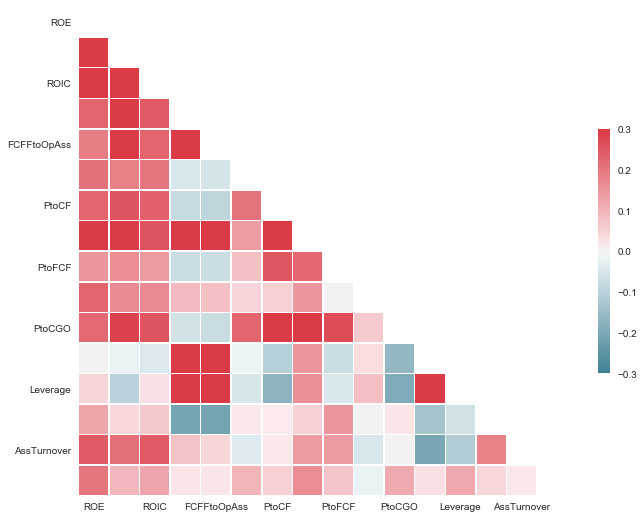

In [3]:
%matplotlib inline
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = cleanRes.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


In [17]:
type(results)

NameError: name 'results' is not defined

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
X,y = cleanRes.drop(['FiveYrReturn'],axis=1),cleanRes['FiveYrReturn']
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=.4)

In [6]:
import tensorflow.contrib.learn as skflow
import tensorflow as tf
import time
from sklearn import metrics

start_time = time.time()


classifier = skflow.DNNRegressor(hidden_units=[10,34,3,54])

import logging
logging.getLogger().setLevel(logging.INFO)

classifier.fit(X_train, y_train,max_steps=500)

y_pred = classifier.predict(X_test)
score = metrics.r2_score(y_test, y_pred)


print(metrics.confusion_matrix(y_test, y_pred))

print("Accuracy: %f" % score)

print("--- %s seconds ---" % (time.time() - start_time))

TypeError: __init__() missing 1 required positional argument: 'feature_columns'

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf = RandomForestRegressor(n_estimators=1000,oob_score=False)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
score = metrics.r2_score(y_test, y_pred)


print("Accuracy: %f" % score)

Accuracy: 0.037642


In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

MLP = MLPRegressor(alpha=.0001)
MLP.fit(X_train,y_train)

y_pred = MLP.predict(X_test)
score = metrics.r2_score(y_test, y_pred)


#print(metrics.confusion_matrix(y_test, y_pred))

print("Accuracy: %f" % score)

Accuracy: -0.076799


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

rf = GradientBoostingRegressor(n_estimators=1000)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
score = metrics.r2_score(y_test, y_pred)


print("Accuracy: %f" % score)

Accuracy: -0.148951


In [11]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
score = metrics.r2_score(y_test, y_pred)


print("Accuracy: %f" % score)
print(y_pred)

ValueError: Unknown label type: 'continuous'